WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Mean of both groups: 0.7589700781741396
Standard Deviation of both groups: 0.2314658145638596


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean_group1, mean_group2, std_group1, std_group2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


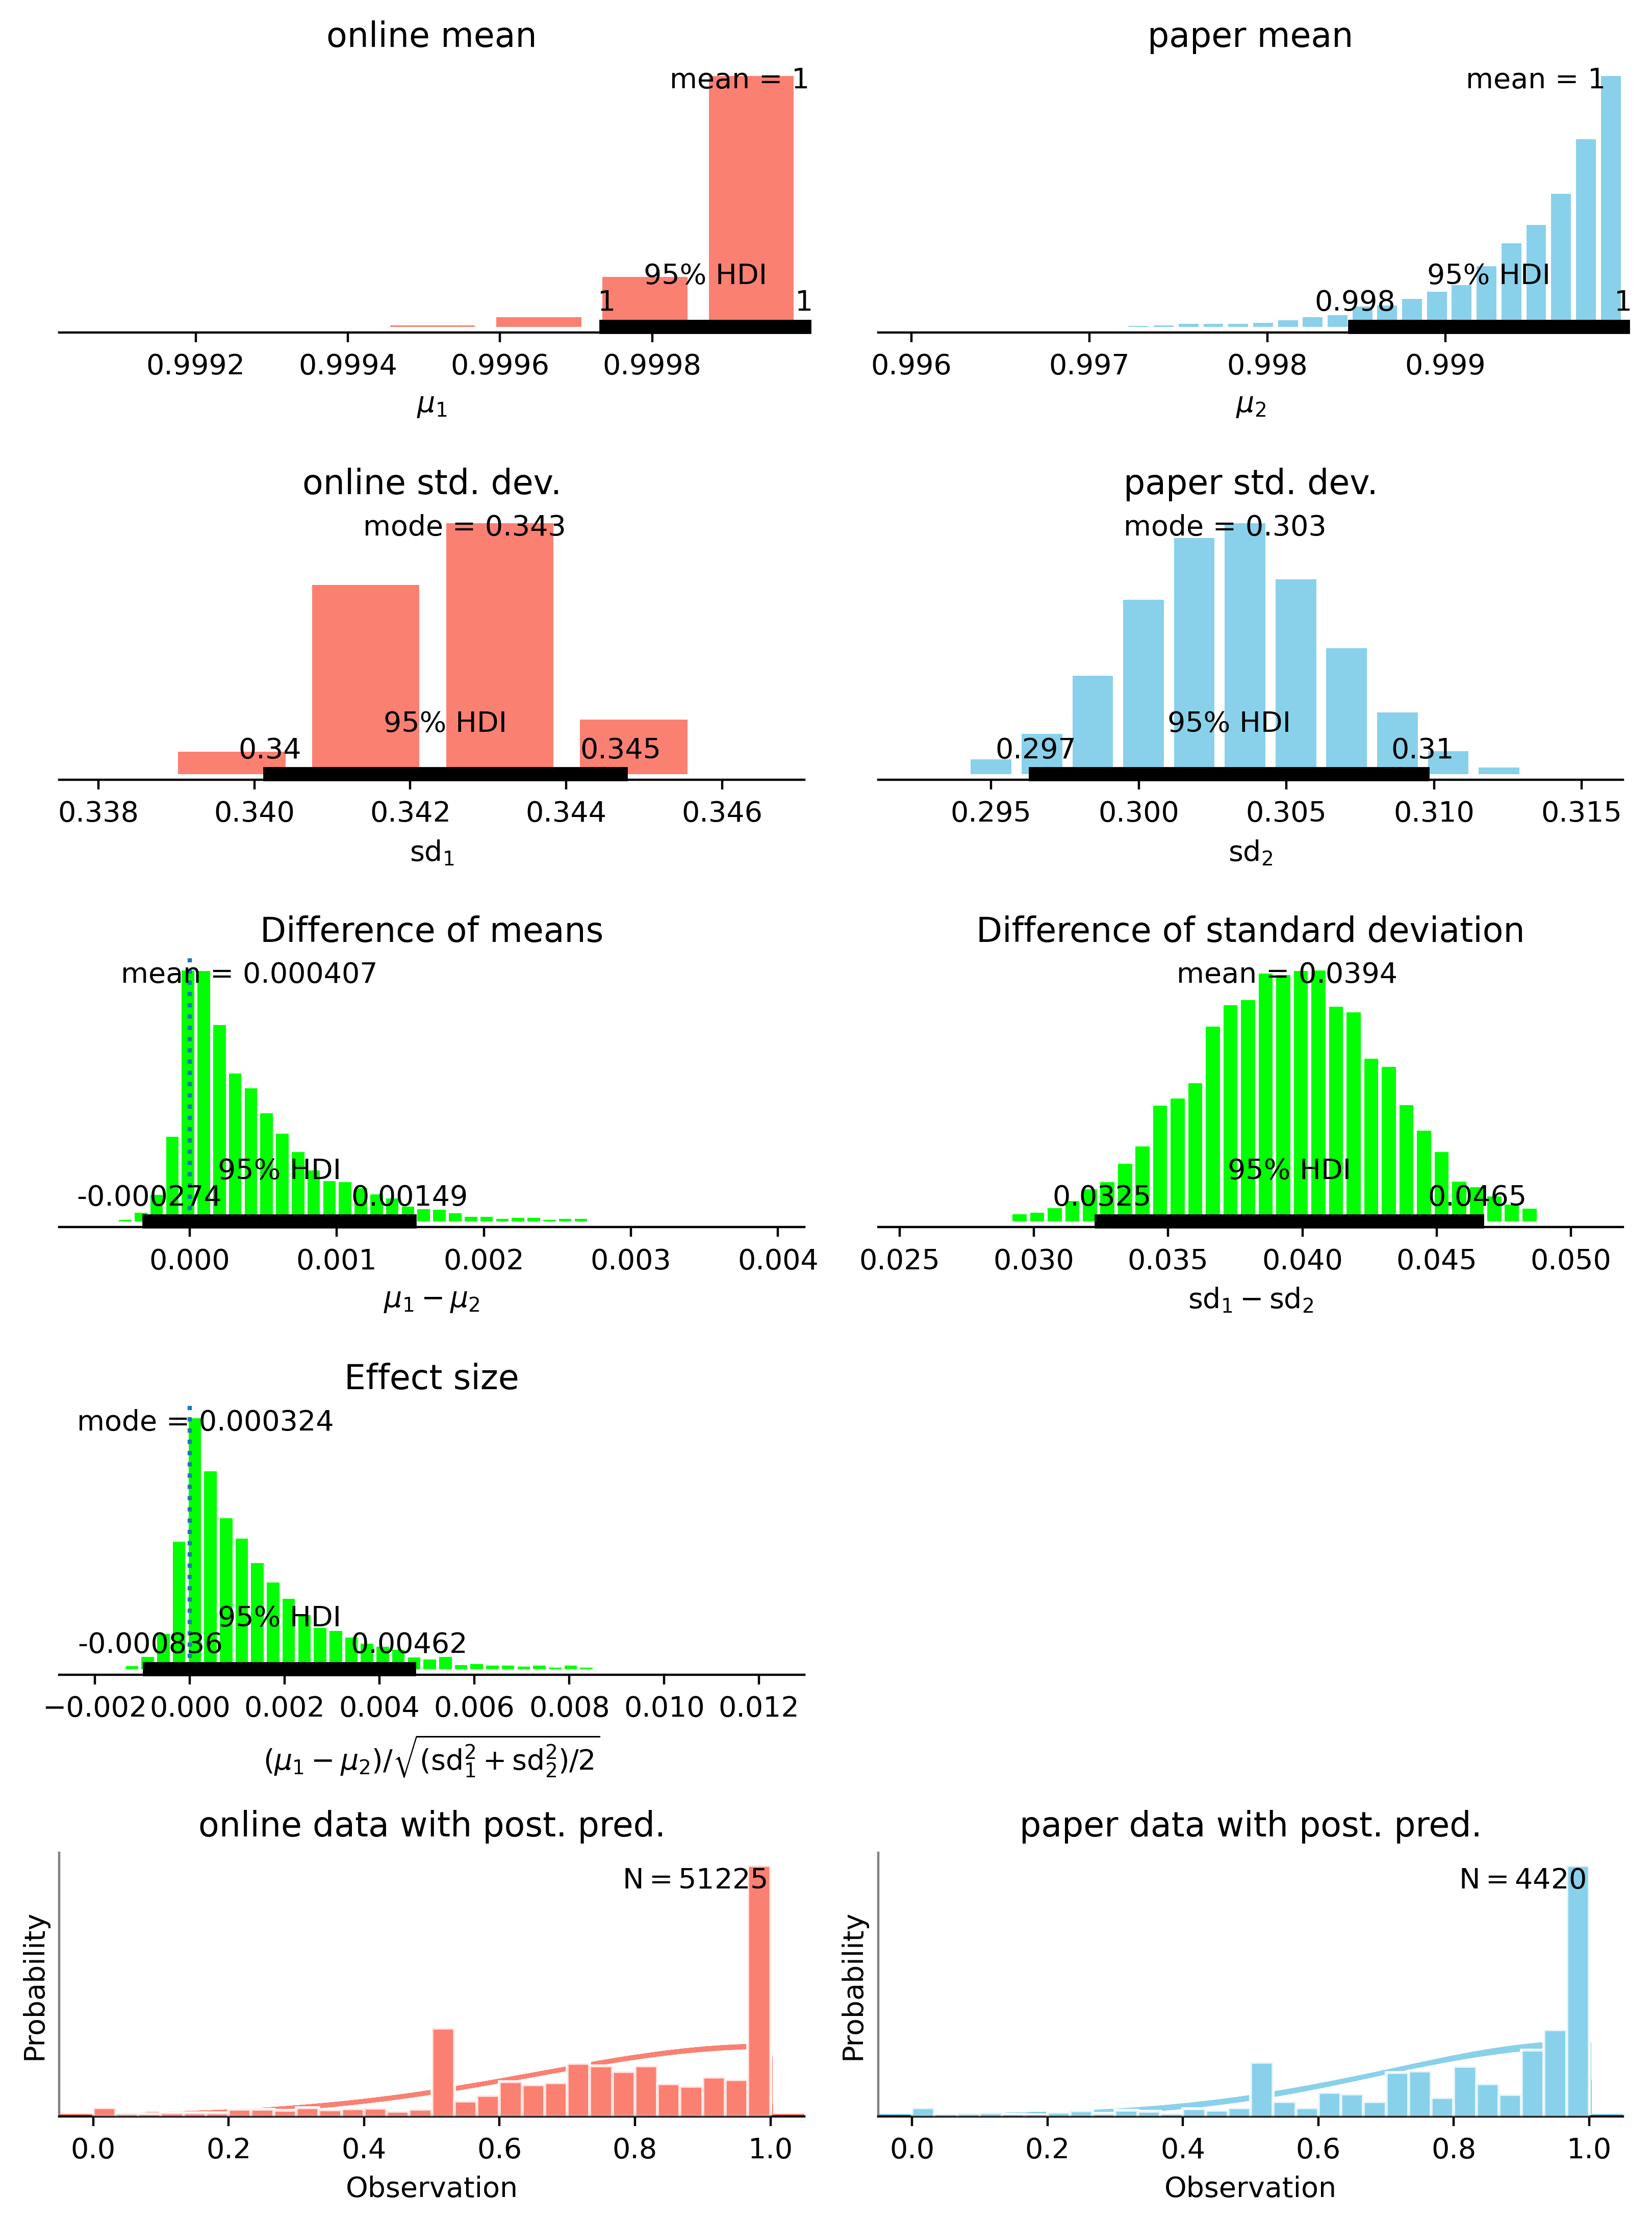

In [1]:
from bayes_test import BayesianHypothesisTestTruncNorm
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestTruncNorm(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type',
                                   lower=0,
                                   upper=1)
study_test.run_model(draws)
study_test.plot_results()

In [2]:
# This will computer various effect sizes
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'mean_group1': {'mean': 0.9999150234186269,
  'hdi_min': 0.9997382141110872,
  'hdi_max': 0.9999999999726801},
 'mean_group2': {'mean': 0.9995020042693782,
  'hdi_min': 0.998477571242927,
  'hdi_max': 0.9999998541565457},
 'std_group1': {'mode': 0.34261471937893784,
  'hdi_min': 0.3401829100233959,
  'hdi_max': 0.34481412089706454},
 'std_group2': {'mode': 0.30266010418880224,
  'hdi_min': 0.29700843603930127,
  'hdi_max': 0.30972288538361076},
 'diff_means': {'mean': 0.00041397918832300734,
  'hdi_min': -0.00027633328246012834,
  'hdi_max': 0.001501666949491498},
 'diff_stds': {'mean': 0.03939206624315405,
  'hdi_min': 0.032250818933460546,
  'hdi_max': 0.045740402925169954},
 'cliff_delta': {'cliff_delta': 0.537267756},
 'non_overlap_effect_size': {'non_overlap_effect_size': 0.9133000000000002},
 'divergent_effect_size': {'divergent_effect_size': 3277.3167271769853}}